In [14]:
f=open('[박경리]_토지2.txt','r', encoding='cp949')

In [15]:
story=f.read()
f.close()

In [70]:
print(type(story))
#print(story)

<class 'str'>


In [17]:
sudo bash
pip list
pip install wordcloud
pip install soynlp

SyntaxError: invalid syntax (<ipython-input-17-9239a7fd3749>, line 1)

In [18]:
!pip show soynlp

Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /home/vscode/.local/lib/python3.7/site-packages
Requires: scikit-learn, psutil, numpy, scipy
Required-by: 


In [19]:
from soynlp.noun import NewsNounExtractor

In [20]:
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract([story]) # list of str like

used default noun predictor; Sejong corpus based logistic predictor
/home/vscode/.local/lib/python3.7/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (66560, 27932, 35309)
predicting noun score was done                                        
before postprocessing 10514
_noun_scores_ 2291
checking hardrules ... done / 2291떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 1445
extracted 4 compounds from eojeolss ... 2000 / 2950

In [74]:
print(type(nouns))
print(nouns)

<class 'dict'>
{'우뚝우뚝': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0), '비죽비죽': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0), '고래고래': NewsNounScore(score=0, frequency=5, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0), '히죽히죽': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0), '토지': NewsNounScore(score=0.9983693333333333, frequency=5, feature_proportion=1.0, eojeol_proportion=0.4, n_positive_feature=3, unique_positive_feature_proportion=1.0), '추적': NewsNounScore(score=0.9979612499999999, frequency=7, feature_proportion=0.6666666666666666, eojeol_proportion=0.14285714285714285, n_positive_feature=3, unique_positive_feature_proportion=1.0), '음모': NewsNounS

{'얼굴': 1.0, '수동': 1.0, '나리마님': 1.0, '날씨': 1.0, '하늘': 1.0, '사랑': 1.0, '참말': 1.0, '연곡사': 1.0, '나으리': 1.0, '마님': 1.0, '소승': 1.0, '세상': 1.0, '짐승': 1.0, '사램': 1.0, '월선': 1.0, '문의원': 1.0, '의원': 1.0, '이곳': 1.0, '읍내': 1.0, '그렇지': 1.0, '그놈': 1.0, '추석': 1.0, '삼월': 1.0, '그기': 1.0, '내일': 1.0, '사당': 1.0, '이년': 1.0, '이서방': 1.0, '우뚝우뚝': 0.5, '비죽비죽': 0.5, '고래고래': 0.5, '히죽히죽': 0.5, '토지': 0.5, '추적': 0.5, '음모': 0.5, '모습': 0.5, '한번': 0.5, '집안': 0.5, '이리': 0.5, '이리저리': 0.5, '기웃': 0.5, '인사': 0.5, '중문': 0.5, '뒷모습': 0.5, '실망': 0.5, '얼굴이': 0.5, '문전': 0.5, '상전': 0.5, '거들떠보지': 0.5, '나귀': 0.5, '말고삐': 0.5, '수염': 0.5, '입술': 0.5, '삼수': 0.5, '복이': 0.5, '곁눈': 0.5, '곁눈질': 0.5, '경계': 0.5, '강물': 0.5, '김평산': 0.5, '기운': 0.5, '사람': 0.5, '언덕': 0.5, '발자국': 0.5, '최참판댁': 0.5, '지붕': 0.5, '시야': 0.5, '고개': 0.5, '짐짝': 0.5, '천지': 0.5, '거맨치': 0.5, '마음': 0.5, '풀잎': 0.5, '이슬': 0.5, '짚세기': 0.5, '구름': 0.5, '움직': 0.5, '들판': 0.5, '바람': 0.5, '송아지': 0.5, '어미': 0.5, '동안': 0.5, '긴장': 0.5, '생각': 0.5, '이분': 0.5, '어른': 0.5, '지리산': 0.5, '구천이': 0.5

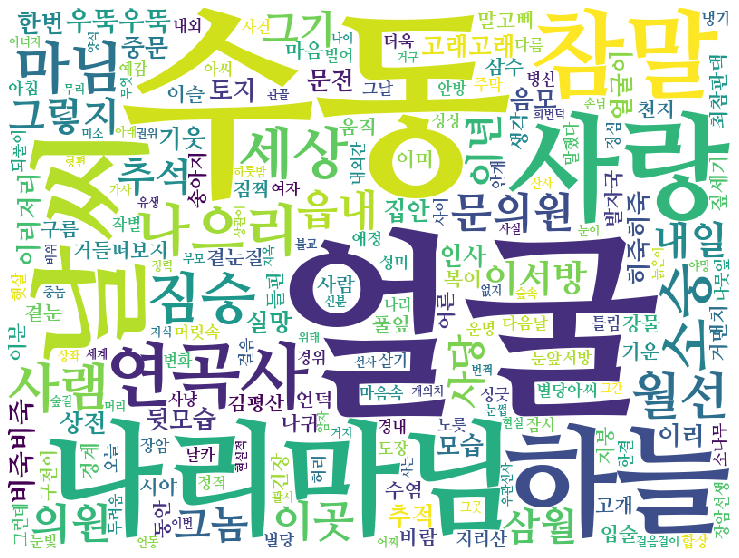

CPU times: user 1.05 s, sys: 61.4 ms, total: 1.11 s
Wall time: 1.26 s


In [33]:
# nouns을 join함수로 문자열을 연결해서 워드 클라우드에 넣어주기
%time displayWordCloud(' '.join(nouns))

In [32]:
stopwords_kr = ['있었다','것이다','그러나','있는','하고','없는','것을','했다']

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(
        font_path= '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoExtraBold.ttf',
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    print(wordcloud.words_)
    plt.figure(figsize=(15,10))
    #이미지화
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

{'내가': 1.0, '그는': 0.9933333333333333, '같은': 0.9733333333333334, '다시': 0.9733333333333334, '강포수는': 0.9533333333333334, '그런': 0.9, '하는': 0.8866666666666667, '것은': 0.8333333333333334, '말을': 0.8333333333333334, '용이는': 0.8266666666666667, '않았다': 0.7333333333333333, '없었다': 0.7266666666666667, '일이': 0.7133333333333334, '하며': 0.7066666666666667, '말이': 0.6533333333333333, '것도': 0.6133333333333333, '한다': 0.58, '그의': 0.5733333333333334, '귀녀는': 0.5533333333333333, '임이네는': 0.5533333333333333, '용이': 0.5533333333333333, '얼굴을': 0.54, '눈을': 0.5333333333333333, '나는': 0.5266666666666666, '보고': 0.52, '사람': 0.52, '있을': 0.5133333333333333, '없이': 0.5133333333333333, '알고': 0.5133333333333333, '없다': 0.5133333333333333, '치수는': 0.5066666666666667, '봉순네는': 0.5066666666666667, '것이': 0.5, '어디': 0.5, '사람이': 0.49333333333333335, '윤씨부인은': 0.47333333333333333, '무슨': 0.4666666666666667, '김서방은': 0.4666666666666667, '눈이': 0.46, '얼굴이': 0.4533333333333333, '하나': 0.43333333333333335, '것이었다': 0.4266666666666667, '가서': 0.42666

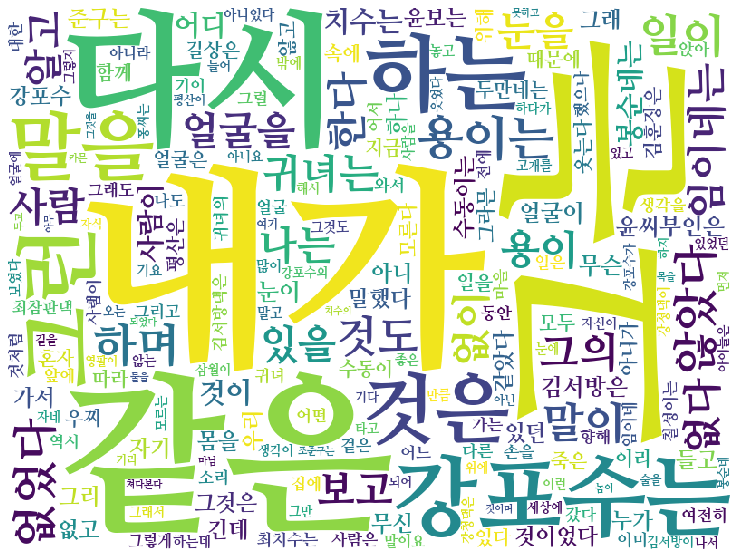

CPU times: user 1.66 s, sys: 47 ms, total: 1.7 s
Wall time: 1.7 s


In [34]:
# 결과를 출력, 빈도수 계산
%time displayWordCloud(story)

In [29]:
# 한국어 자연어 처리 라이브러리
!pip show konlpy

Name: konlpy
Version: 0.5.2
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /home/vscode/.local/lib/python3.7/site-packages
Requires: colorama, tweepy, lxml, numpy, beautifulsoup4, JPype1
Required-by: 


In [2]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [4]:
kkma = Kkma()
# 한국어 자연어 처리, 쪼개기
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [5]:
# 명사뽑기
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [7]:
# 형태소 뽑기
pprint(kkma.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


In [9]:
from konlpy.tag import Hannanum
# 개체 생성
hannanum = Hannanum()

In [11]:
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))

['다람쥐', '쳇바퀴', '타고파']


In [28]:
from konlpy.tag import Okt
okt = Okt()
data = okt.nouns(story)
data

['토지',
 '지은이',
 '박경리',
 '출판사',
 '솔',
 '봉사자',
 '강현정',
 '조윤정',
 '제',
 '편',
 '추적',
 '음모',
 '장',
 '추적',
 '녀',
 '모습',
 '한번',
 '집안',
 '기웃',
 '거리',
 '던',
 '강표',
 '수',
 '윤씨',
 '부',
 '인',
 '인사',
 '중문',
 '치수',
 '뒷모습',
 '실망',
 '얼굴',
 '강표',
 '수',
 '치수',
 '뒤',
 '수',
 '문전',
 '하인',
 '상전',
 '전송',
 '위해',
 '치수',
 '나귀',
 '등',
 '말고삐',
 '수동',
 '수염',
 '작',
 '은',
 '입술',
 '하인',
 '일별',
 '삼수',
 '묘',
 '복',
 '삼수',
 '곁눈질',
 '짐',
 '실',
 '다른',
 '필',
 '나귀',
 '텁',
 '부리',
 '강',
 '포수',
 '경계',
 '말고삐',
 '코',
 '나리',
 '마님',
 '가끔',
 '인사',
 '최',
 '치수',
 '말',
 '안장',
 '강물',
 '단촐',
 '출발',
 '하인',
 '서너',
 '명',
 '수행',
 '하리',
 '김',
 '평산',
 '동행',
 '예',
 '상',
 '기운',
 '편도',
 '수동',
 '사람',
 '데리',
 '강',
 '포수',
 '출발',
 '것',
 '거주',
 '춤',
 '하인',
 '언덕길',
 '두',
 '필',
 '나귀',
 '일행',
 '강',
 '끼',
 '나귀',
 '사람',
 '발자국',
 '길',
 '간다',
 '몇',
 '번',
 '고',
 '아쉬움',
 '가득',
 '강',
 '포수',
 '최',
 '참판',
 '댁',
 '지붕',
 '시야',
 '눈',
 '고개',
 '숙어',
 '지면',
 '발끝',
 '눈길',
 '머',
 '영영',
 '안',
 '나귀',
 '강',
 '포수',
 '곁눈질',
 '끝내',
 '코',
 '분다',
 '나귀',
 '등',
 '최',
 '치수',
 '뒷모습',

{'사람': 1.0, '서방': 0.8377192982456141, '포수': 0.8289473684210527, '얼굴': 0.7456140350877193, '생각': 0.743421052631579, '치수': 0.6622807017543859, '용이': 0.5921052631578947, '소리': 0.5197368421052632, '아이': 0.4057017543859649, '수동': 0.3969298245614035, '윤씨 부인': 0.3574561403508772, '그것': 0.3442982456140351, '다시': 0.3267543859649123, '평산': 0.32456140350877194, '마을': 0.3201754385964912, '참판': 0.3048245614035088, '하나': 0.30043859649122806, '어디': 0.27631578947368424, '강청댁': 0.25877192982456143, '여자': 0.25219298245614036, '마음': 0.25, '칠성': 0.24780701754385964, '삼월': 0.24780701754385964, '윤보': 0.24561403508771928, '보고': 0.2412280701754386, '구마': 0.23684210526315788, '모양': 0.23464912280701755, '서희': 0.23464912280701755, '자신': 0.2324561403508772, '때문': 0.23026315789473684, '김훈': 0.23026315789473684, '자식': 0.22149122807017543, '세상': 0.21271929824561403, '아낙': 0.20175438596491227, '양반': 0.19956140350877194, '계집': 0.19298245614035087, '우리': 0.19298245614035087, '자기': 0.18201754385964913, '바람': 0.175438596

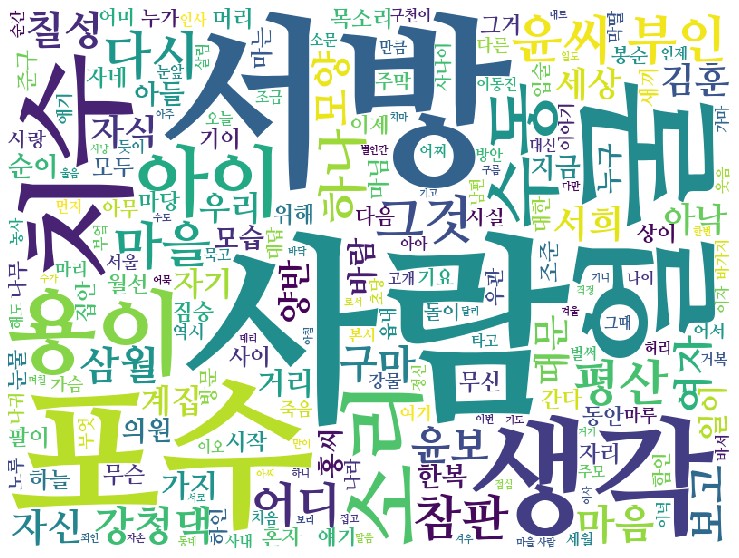

CPU times: user 1.27 s, sys: 46.1 ms, total: 1.32 s
Wall time: 1.32 s


In [35]:
# konlpy와 soynlpy결과가 다름
%time displayWordCloud(' '.join(data))

In [36]:
# 이미지 파일 위에 워드 클라우드 출력하기
from PIL import Image
import numpy

In [49]:
img = Image.open('cloud.png')
img_array=numpy.array(img)
img_array

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

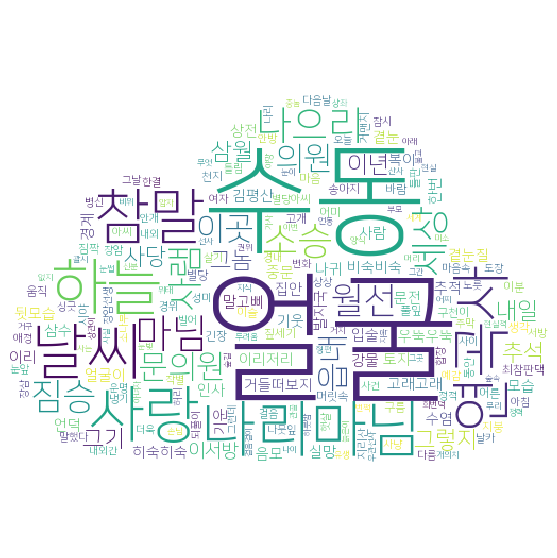

In [50]:
wordcloud = WordCloud(font_path = '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareL.ttf',
                     stopwords = stopwords_kr,
                     background_color = 'white',
                     mask = img_array,
                     width=800,height=600).generate(' '.join(nouns))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#이미지로 결과 저장
wordcloud.to_file("simple.png")

In [76]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

news=[]
url='https://news.naver.com/'
response = urllib.request.urlopen(url)
soup=BeautifulSoup(response,'html.parser')
results=soup.select('.section_list_ranking li a')
for result in results:
    #print('제목:',result.attrs['title'])
    #print('링크:',result.attrs['href'])
    title=result.attrs['title']
    href=result.attrs['href']
    url_content='https://news.naver.com'+result.attrs['href']
    response_content = urllib.request.urlopen(url_content)
    soup_content=BeautifulSoup(response_content,'html.parser')
    content=soup_content.select_one('#articleBodyContents')
    #print(content.contents)

    #가공작업
    output=''
    for item in content.strings:
        stripped = str(item).strip()    #공백제거
        if stripped=='':
            continue
        else:
             output+=item
    output=output.replace('본문 내용TV플레이어','')
    output=output.replace('// flash 오류를 우회하기 위한 함수 추가','')
    output=output.replace('function _flash_removeCallback() {}','')
    output=output.strip()
    news.append({'title':title,'href':href,'contents':output})
    #print(type(result))
    
#print(news)    
dataframe=pd.DataFrame(news)
dataframe.to_csv("news.csv")

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.

In [59]:
import pandas as pd
df = pd.read_csv('news.csv', engine='python', encoding='utf-8')

In [60]:
# 뉴스 제목으로만 워드 클라우드 만들 때
sample_title = df['title'][:2]
sample_title

0     이재명, 배달의민족 저격 "힘 좀 가졌다고…독과점 횡포 시작"
1    식목일에 강릉 간 文대통령 부부, 산불 피해지에 금강소나무 심어
Name: title, dtype: object

In [61]:
# 뉴스 내용
sample_content = df['contents'][:2]
sample_content

0    이재명 경기도지사가 배달앱 플랫폼 배달의민족을 비판하는 글을 지난 4일 오후 페이스...
1    작년 산불 피해 주민 등 40여명과 함께 식수文대통령 든 삽은 산불 피해 나무로 만...
Name: contents, dtype: object

In [64]:
# 총 60건
df.shape

(60, 4)

In [77]:
import re
# 정규표현식! *은 0개이상의 문자를 뜻함, .은 임의의 문자 한개에 대응
p = '.*(코로나|여행|비행기|호텔).*'
# 제목 가져와서 str문자열로 바꾼 다음 p패턴과 매치가 되는지 검사 => 매치 되면 true
# 내용 가져와서 str문자열로 바꾼 다음, p 패턴과 매치가 되는지 검사, flags는 여러줄 처리할 때 쓰임
topic = df[df['title'].str.match(p)|df['contents'].str.match(p, flags=re.MULTILINE)]

# 위의 조건 만족하는 것이 42건
topic.shape

    Unnamed: 0                                              title  \
1            1                식목일에 강릉 간 文대통령 부부, 산불 피해지에 금강소나무 심어   
3            3                   이재명, 배달의민족 겨냥 “독과점 배달앱 횡포 억제할 것”   
4            4               김종인 "경제 바이러스가 온다… 조국과 경제, 둘중 뭘 살릴거냐"   
5            5  안철수 “의료봉사 ‘쇼’하는 것으로 만들기 위해 내가 사진만 찍는다는 가짜뉴스 퍼트렸다”   
6            6                 안철수 "정부 정치쇼에 싫증…내 의료봉사가 쇼? 행동이 중요"   
8            8            안철수 "현 정권 '정치쇼'에 싫증 느끼는 분 많아... 우리는 진심"   
9            9                 文대통령, 이번엔 강원行…총선 앞두고 잇딴 `험지` 행보 주목   
10          10                   독일行 마스크 20만장 낚아챈 美…"마스크 해적질 멈춰라"   
11          11                [속보] 코로나19 집단발생 82.6%…의정부성모병원 40명 등   
12          12                   "변심해도 새 차로 교환"…중국서 파격 승부수 던진 현대차   
15          15                “코로나 백신만 나오면…” 아마추어 ‘전염병 학자’가 된 개미?   
16          16                    떨어지는 서울 아파트 실거래가…개포주공 6억6000만원↓   
17          17                 '2800억' 적자 낸 쌍용차, 마힌드라 투자 포기에 '비상'   
18          18                    

In [65]:
# 위에서 부터 5개, tail=> 끝에서 sample=> 섞어서
topic.head()

,Unnamed: 0,title,href,contents
1,1,"식목일에 강릉 간 文대통령 부부, 산불 피해지에 금강소나무 심어",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,작년 산불 피해 주민 등 40여명과 함께 식수文대통령 든 삽은 산불 피해 나무로 만...
3,3,"이재명, 배달의민족 겨냥 “독과점 배달앱 횡포 억제할 것”",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,"이 지사 “독과점, 불공정 거래로 불평등·격차 키우면 결국 시장경제생태계 망가지고 ..."
4,4,"김종인 ""경제 바이러스가 온다… 조국과 경제, 둘중 뭘 살릴거냐""",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,"대전 찾은 김종인 ""민주당 후보, 거수기 노릇""김종인 미래통합당 총괄선대위원장이 5..."
5,5,안철수 “의료봉사 ‘쇼’하는 것으로 만들기 위해 내가 사진만 찍는다는 가짜뉴스 퍼트렸다”,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,안 대표 “정치인에게 중요한 것은 보여지는 게 아닌 무엇을 하는지 여부…말보다 행동...
6,6,"안철수 ""정부 정치쇼에 싫증…내 의료봉사가 쇼? 행동이 중요""",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,안철수 국민의당 대표가 공식 선거운동으로 닷세째 마라톤을 이어가고 있는 가운데 5일...


In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(
        font_path= '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareL.ttf',
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    # print(wordcloud.words_)
    plt.figure(figsize=(15,10))
    #이미지화
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [81]:
# noun_extractor = NewsNounExtractor()
# nouns = noun_extractor.train_extract([df['contents']]) # list of str like
from soynlp.noun import LRNounExtractor

%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(df['contents'])
nouns = noun_extractor.extract()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2193, 1199) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 524 nouns are extracted


{'아이': 1.0, '예정': 1.0, '활용': 0.5, '처음': 0.5, '가능': 0.5, '계속': 0.5, '나무': 0.5, '매각': 0.5, '감동': 0.5, '제보': 0.5, '사이': 0.5, '영웅': 0.5, '행동': 0.5, '취재': 0.5, '지지': 0.5, '횡포': 0.5, '음악': 0.5, '원칙': 0.5, '의혹': 0.5, '인생': 0.5, '오픈': 0.5, '협력': 0.5, '전망': 0.5, '반응': 0.5, '정부': 0.5, '각국': 0.5, '전파': 0.5, '방법': 0.5, '옷걸': 0.5, '때문': 0.5, '국회': 0.5, '구조': 0.5, '추진': 0.5, '심리': 0.5, '행보': 0.5, '시행': 0.5, '이상': 0.5, '사진': 0.5, '1천': 0.5, '비용': 0.5, '대비': 0.5, '하락': 0.5, '소통': 0.5, '엄마': 0.5, '하나': 0.5, '진행': 0.5, '경북': 0.5, '묘소': 0.5, '함께': 0.5, '실직': 0.5, '보호': 0.5, '제작': 0.5, '판단': 0.5, '신청': 0.5, '거주': 0.5, '관련': 0.5, '여당': 0.5, '극복': 0.5, '신고': 0.5, '메뉴': 0.5, '축가': 0.5, '개발': 0.5, '사장': 0.5, '증가': 0.5, '대중': 0.5, '부인': 0.5, '진료': 0.5, '방문': 0.5, '소리': 0.5, '시작': 0.5, '차질': 0.5, '대화': 0.5, '개인': 0.5, '폐쇄': 0.5, '자녀': 0.5, '매물': 0.5, '지침': 0.5, '무엇': 0.5, '검사': 0.5, '질문': 0.5, '방역': 0.5, '이전': 0.5, '위로': 0.5, '출시': 0.5, '종합': 0.5, '최대': 0.5, '기록': 0.5, '상황': 0.5, '계획': 0.5, '채널': 0.5, '소스': 0.5

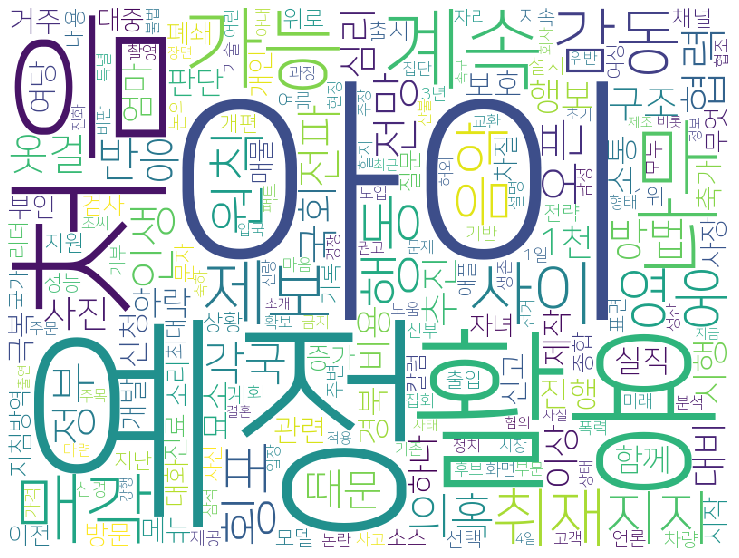

CPU times: user 1.28 s, sys: 40 ms, total: 1.32 s
Wall time: 1.32 s


In [83]:
%time displayWordCloud(' '.join(nouns))